<h1>Exploring the Influence of European Monarchies' History on "The Crown" Viewership Trends</h1>


## Objective

The objective of this notebook is to analyze the regional popularity and impact of Netflix's series "The Crown." I will examine its performance across different regions based on Netflix's Top 10 appearances data. My aim is to explore why "The Crown" has been particularly popular, focusing on viewership trends and cultural resonance.


## Data Collection

The data for this analysis was sourced from Netflix's viewership statistics, specifically their publicly released Top 10 lists. These lists categorize the number of times "The Crown" appeared in top positions by region, as categorized by the United Nations Statistical Yearbook Annex. This categorization allows us to analyze regional trends effectively. For more detailed information, you can view the data [here](https://www.netflix.com/tudum/top10/).


In [28]:
## Libraries and Data Loading
##First, let's import the necessary libraries and load the data.
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [29]:
# Step 1: Data Collection
# In this cell, we will load the data from its source.

# Import necessary libraries
import pandas as pd

# Load the data
df = pd.read_excel("all-weeks-countries.xlsx")

# Display the first 10 rows of the dataset
df.head(10)

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2024-06-16,Films,1,Under Paris,NaN,2
1,Argentina,AR,2024-06-16,Films,2,Mission: Impossible - Dead Reckoning,NaN,1
2,Argentina,AR,2024-06-16,Films,3,Cuando acecha la maldad,NaN,1
3,Argentina,AR,2024-06-16,Films,4,Inheritance,NaN,3
4,Argentina,AR,2024-06-16,Films,5,Sing 2,NaN,4
5,Argentina,AR,2024-06-16,Films,6,The Price of Nonna's Inheritance,NaN,2
6,Argentina,AR,2024-06-16,Films,7,Four Brothers,NaN,1
7,Argentina,AR,2024-06-16,Films,8,Colors of Evil: Red,NaN,3
8,Argentina,AR,2024-06-16,Films,9,Apaixonada,NaN,1
9,Argentina,AR,2024-06-16,Films,10,Safe House,NaN,1


Let's take a closer look at the structure and summary of the dataset to understand what we're working with.

In [30]:
#Let's take a closer look at the structure and summary of the dataset to understand what we're working with.
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289000 entries, 0 to 288999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country_name                289000 non-null  object
 1   country_iso2                289000 non-null  object
 2   week                        289000 non-null  object
 3   category                    289000 non-null  object
 4   weekly_rank                 289000 non-null  int64 
 5   show_title                  289000 non-null  object
 6   season_title                141348 non-null  object
 7   cumulative_weeks_in_top_10  289000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.6+ MB


## Data Cleaning and Preparation

I began by cleaning the data to ensure accuracy in the analysis. This involved checking for any missing values, removing duplicates, and standardizing the regional classifications to maintain consistency across the dataset. The clean dataset includes the number of appearances of "The Crown" in Netflix's Top 10 lists, broken down by region.

In [31]:
# Filter the data to include only a srting = "The Crown"
crown_df = df[df['show_title'].str.contains(r'\bThe Crown\b', regex=True)]

# Display the filtered data
display(crown_df)
print(crown_df.columns)

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
496,Argentina,AR,2023-12-31,TV,7,The Crown,The Crown: Season 6,6
512,Argentina,AR,2023-12-24,TV,3,The Crown,The Crown: Season 6,5
534,Argentina,AR,2023-12-17,TV,5,The Crown,The Crown: Season 6,4
576,Argentina,AR,2023-12-03,TV,7,The Crown,The Crown: Season 6,3
593,Argentina,AR,2023-11-26,TV,4,The Crown,The Crown: Season 6,2
...,...,...,...,...,...,...,...,...
284437,Venezuela,VE,2022-11-27,TV,8,The Crown,The Crown: Season 5,3
284453,Venezuela,VE,2022-11-20,TV,4,The Crown,The Crown: Season 5,2
284472,Venezuela,VE,2022-11-13,TV,3,The Crown,The Crown: Season 5,1
284615,Venezuela,VE,2022-09-25,TV,6,The Crown,The Crown: Season 1,2


Index(['country_name', 'country_iso2', 'week', 'category', 'weekly_rank',
       'show_title', 'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')


In [32]:
print(crown_df.columns)

Index(['country_name', 'country_iso2', 'week', 'category', 'weekly_rank',
       'show_title', 'season_title', 'cumulative_weeks_in_top_10'],
      dtype='object')


##  Data Analysis

In this section, I perform an initial exploration of the data to identify patterns. I will use visualizationto display how frequently "The Crown" appeared in the Top 10 lists across different regions. This visual approach helps in understanding the regional distribution of the show's popularity.


In [33]:
# Count the number of appearances for each country
country_counts = crown_df['country_iso2'].value_counts()
country_counts.head(10) 

country_iso2
UA    51
RS    29
MT    28
GB    27
SK    24
IE    24
IT    23
HU    23
RO    23
CZ    21
Name: count, dtype: int64

In [34]:
# Calculate the average number of appearances
average_appearances = country_counts.mean()
print(f"Average appearances per country: {average_appearances}")

Average appearances per country: 13.741573033707866


To further enhance this section, let's visualize the data using a bar plot. This will help readers quickly grasp the distribution of appearances across different countries.

/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_13073/2364305971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='Blues_d')


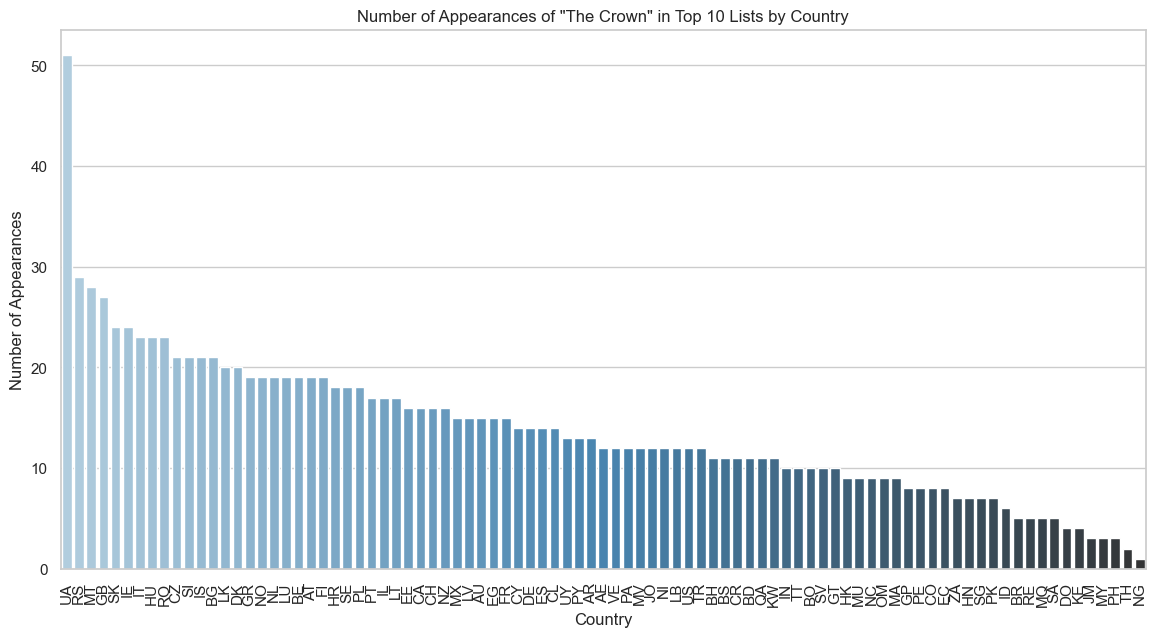

In [35]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for the number of appearances by country
plt.figure(figsize=(14, 7))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Blues_d')

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Set the plot labels and title
plt.xlabel('Country')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances of "The Crown" in Top 10 Lists by Country')

# Show the plot
plt.show()

<html>
<h2>Key Findings I: Detailed Country Analysis</h2>
<p>The initial geographic breakdown reveals a diverse and intriguing pattern of viewership for 'The Crown' across various countries:</p>
<ul>
    <li><strong>Ukraine:</strong> Leads with 51 appearances.</li>
    <li><strong>Serbia:</strong> Has 29 appearances.</li>
    <li><strong>Malta:</strong> Records 28 appearances.</li>
    <li><strong>United Kingdom:</strong> Shows 27 appearances, aligning with expectations given the show's British setting.</li>
    <li><strong>Slovakia and Ireland:</strong> Each have 24 appearances.</li>
    <li><strong>Italy, Hungary, and Romania:</strong> Each have 23 appearances.</li>
    <li><strong>Czech Republic, Slovenia, Iceland, and Bulgaria:</strong> Each have 21 appearances.</li>
    <li><strong>Sri Lanka and Denmark:</strong> Each have 20 appearances.</li>
    <li><strong>Greece, Norway, Netherlands, Luxembourg, and Belgium:</strong> Each have 19 appearances.</li>
</ul>
<p>The viewership in the UK is as expected, given the show’s focus on the British monarchy. However, the substantial interest in countries like Ukraine, Serbia, and Malta highlights a broader European fascination with royal themes and historical drama.</p>
<p>In the next section, we will delve deeper into the viewership trends in Ukraine, analyzing its frequency of appearances compared to the average across all countries.</p>
</html>



In [36]:
# Number of appearances of Ukraine
ukraine_appearances = country_counts.get('UA', 0)
# Calculate how much more Ukraine appears in percentage
ukraine_vs_average = ((ukraine_appearances - average_appearances) / average_appearances) * 100

print(f"Ukraine appears {ukraine_appearances} times.")
print(f"The average number of appearances per country is {average_appearances:.2f}.")
print(f"Ukraine appears {ukraine_vs_average:.2f}% more than the average country.")

Ukraine appears 51 times.
The average number of appearances per country is 13.74.
Ukraine appears 271.14% more than the average country.


<html>
<h2>Expanding the Data Scope</h2>
<p>To enrich my analysis of 'The Crown,' I am expanding the dataset to include additional regions, specifically focusing on countries that have transitioned from monarchies or were once British colonies. This extension is crucial for exploring the unique appeal of 'The Crown,' which intricately portrays the dynamics of British royal history and its global implications.</p>
<p>I am incorporating data based on the United Nations geoscheme for regional classification. This allows for a structured analysis within a geopolitical framework, providing insights into how historical changes in governance, such as the shift from monarchies to republics or the independence of colonies, influence the contemporary cultural reception of royal themes portrayed in the series.</p>
<p>By understanding these historical contexts, especially in regions undergoing significant political transformations or decolonization, I can, perhaps, better understand the regional variations in the show's popularity. This approach will help identify patterns and themes that resonate most with audiences in different parts of the world.</p>
<p>For detailed definitions of regional classifications and a list of countries by their date of transition to a republican system of government, refer to the following resources:</p>
<ul>
<li><a href="https://esa.un.org/MigFlows/Definition%20of%20regions.pdf">United Nations Definition of Regions</a></li>
<li><a href="https://en.wikipedia.org/wiki/List_of_countries_by_date_of_transition_to_a_republican_system_of_government">Countries by Date of Transition to a Republican System of Government</a></li>
</ul>
</html>


In [37]:
# Load the regional classification data
df_Regional = pd.read_csv("Continent.csv")

# Display the first few rows of the regional dataset
df_Regional.head()

,country_name,country_iso2,Continent,Regional
0,Egypt,EG,Africa,Northern Africa
1,Kenya,KE,Africa,Eastern Africa
2,Mauritius,MU,Africa,Eastern Africa
3,Morocco,MA,Africa,Northern Africa
4,Nigeria,NG,Africa,Western Africa


In [38]:
country_counts.info() 
df_Regional.info()
df_Regional['Regional'] = df_Regional['Regional'].str.strip()


# Convert the Series to a DataFrame
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ["country_iso2", "number of appearances"]

# Merge the DataFrames
merged_df = pd.merge(country_counts_df, df_Regional, on="country_iso2", how="left")


<class 'pandas.core.series.Series'>
Index: 89 entries, UA to NG
Series name: count
Non-Null Count  Dtype
--------------  -----
89 non-null     int64
dtypes: int64(1)
memory usage: 3.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_name  92 non-null     object
 1   country_iso2  92 non-null     object
 2   Continent     92 non-null     object
 3   Regional      92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [39]:
# Convert the Series to a DataFrame
country_counts_df = country_counts.reset_index()
country_counts_df.columns = ["country_iso2", "appearances"]

# Merge the DataFrames
merged_df = pd.merge(country_counts_df, df_Regional, on="country_iso2", how="left")

# Display the merged DataFrame


print(merged_df)

   country_iso2  appearances    country_name  Continent            Regional
0            UA           51         Ukraine     Europe      Eastern Europe
1            RS           29          Serbia     Europe     Southern Europe
2            MT           28           Malta     Europe     Southern Europe
3            GB           27  United Kingdom     Europe     Northern Europe
4            SK           24        Slovakia     Europe      Eastern Europe
..          ...          ...             ...        ...                 ...
84           JM            3         Jamaica  Caribbean           Caribbean
85           MY            3        Malaysia       Asia  South-eastern Asia
86           PH            3     Philippines       Asia  South-eastern Asia
87           TH            2        Thailand       Asia  South-eastern Asia
88           NG            1         Nigeria     Africa      Western Africa

[89 rows x 5 columns]


Table of Appearances by Region:
              Regional  appearances
7      Northern Europe          196
4       Eastern Europe          181
13     Southern Europe          169
15        Western Asia          126
16      Western Europe          121
10       South America          104
1      Central America           77
12       Southern Asia           60
8              Oceania           40
0            Caribbean           31
6     Northern America           28
2       Eastern Africa           28
5      Northern Africa           24
11  South-eastern Asia           21
3         Eastern Asia            9
9         South Africa            7
14      Western Africa            1


/var/folders/mg/3z0_j0zn1vs7wfc3gz5xb6gw0000gn/T/ipykernel_13073/139567809.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Regional', y='appearances', data=regional_appearances, palette='Blues_d')


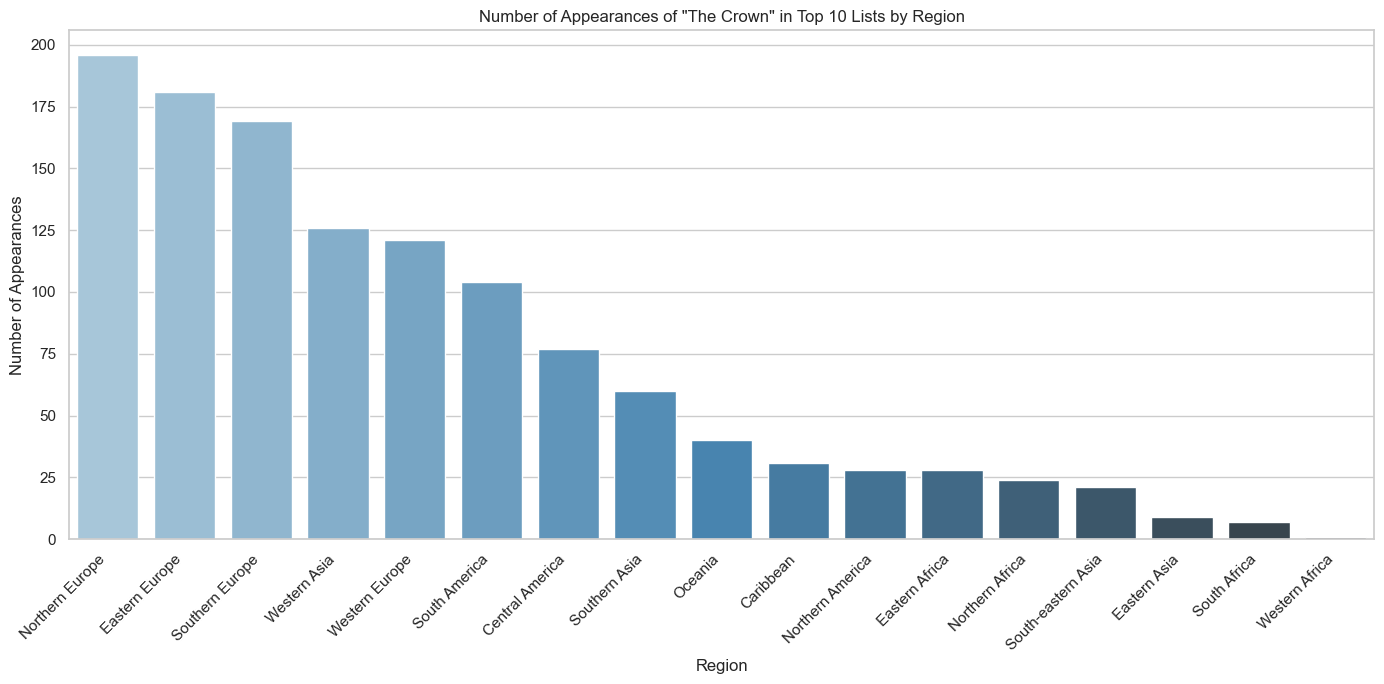

In [40]:
# Group by 'Regional' and sum the 'appearances'

regional_appearances = merged_df.groupby('Regional')['appearances'].sum().reset_index()
regional_appearances = regional_appearances.sort_values(by='appearances', ascending=False)


# Sort the data by appearances from high to low
regional_appearances = regional_appearances.sort_values(by='appearances', ascending=False)

# Display the table
print("Table of Appearances by Region:")
print(regional_appearances)

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x='Regional', y='appearances', data=regional_appearances, palette='Blues_d')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the plot labels and title
plt.xlabel('Region')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances of "The Crown" in Top 10 Lists by Region')

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Regional' and aggregate the 'appearances'
regional_appearances = merged_df.groupby('Regional')['appearances'].agg(['sum', 'min', 'max','mean']).reset_index()
regional_appearances = regional_appearances.sort_values(by='sum', ascending=False)

# Display the table
print("Table of Appearances by Region:")
print(regional_appearances)

Table of Appearances by Region:
              Regional  sum  min  max       mean
7      Northern Europe  196   15   27  19.600000
4       Eastern Europe  181   18   51  25.857143
13     Southern Europe  169   14   29  21.125000
15        Western Asia  126    5   17  11.454545
16      Western Europe  121   14   19  17.285714
10       South America  104    5   14  10.400000
1      Central America   77    7   15  11.000000
12       Southern Asia   60    7   20  12.000000
8              Oceania   40    9   16  13.333333
0            Caribbean   31    3   11   6.200000
6     Northern America   28   12   16  14.000000
2       Eastern Africa   28    4   10   7.000000
5      Northern Africa   24    9   15  12.000000
11  South-eastern Asia   21    2    7   4.200000
3         Eastern Asia    9    9    9   9.000000
9         South Africa    7    7    7   7.000000
14      Western Africa    1    1    1   1.000000


In [42]:
rank_stats_df = merged_df.groupby(['country_iso2', 'Regional']).agg(
    median_appearances=('appearances', 'median'),
    average_appearances=('appearances', 'mean')
).reset_index()

# Display the results
print(rank_stats_df)

   country_iso2          Regional  median_appearances  average_appearances
0            AE      Western Asia                12.0                 12.0
1            AR     South America                13.0                 13.0
2            AT    Western Europe                19.0                 19.0
3            AU           Oceania                15.0                 15.0
4            BD     Southern Asia                11.0                 11.0
..          ...               ...                 ...                  ...
84           UA    Eastern Europe                51.0                 51.0
85           US  Northern America                12.0                 12.0
86           UY     South America                13.0                 13.0
87           VE     South America                12.0                 12.0
88           ZA      South Africa                 7.0                  7.0

[89 rows x 4 columns]


<html>
<h2>Key Findings II: Regional Interest Breakdown</h2>
<p>Our analysis highlights significant regional differences in the viewership of 'The Crown.' Below is a summary of appearances by region, which reflects the distribution of interest across various global regions:</p>
<ul>
    <li><strong>Northern Europe:</strong> Leads with 196 appearances.</li>
    <li><strong>Eastern Europe:</strong> Follows closely with 181 appearances.</li>
    <li><strong>Southern Europe:</strong> Shows robust engagement with 169 appearances.</li>
    <li><strong>Western Europe:</strong> Has a significant presence with 121 appearances.</li>
    <li><strong>South America and Western Asia:</strong> Both demonstrate strong interest with 104 appearances each.</li>
</ul>
</html>


In [43]:
# Merge crown_df with df_Regional to add Regional information
merged_crown_df = pd.merge(crown_df, df_Regional, on='country_iso2', how='left')

# Group by 'country_name' and 'Regional' and calculate median and average of 'weekly_rank'
rank_stats_df = merged_crown_df.groupby(['country_iso2', 'Regional']).agg(
    median_weekly_rank=('weekly_rank', 'median'),
    average_weekly_rank=('weekly_rank', 'mean')
).reset_index()

# Calculate the sum of appearances for each country
appearances_sum = merged_crown_df.groupby('country_iso2').size().reset_index(name='sum_appearances')

# Merge the sum of appearances with the rank_stats_df
rank_stats_df = pd.merge(rank_stats_df, appearances_sum, on='country_iso2', how='left')

# Display the results
rank_stats_df.head

<bound method NDFrame.head of    country_iso2          Regional  median_weekly_rank  average_weekly_rank  \
0            AE      Western Asia                 5.0             4.916667   
1            AR     South America                 5.0             5.230769   
2            AT    Western Europe                 5.0             5.105263   
3            AU           Oceania                 3.0             3.866667   
4            BD     Southern Asia                 5.0             5.454545   
..          ...               ...                 ...                  ...   
84           UA    Eastern Europe                 5.0             5.176471   
85           US  Northern America                 3.5             4.583333   
86           UY     South America                 5.0             5.076923   
87           VE     South America                 6.5             6.416667   
88           ZA      South Africa                 3.0             4.857143   

    sum_appearances  
0          

In [44]:
# Add rank column based on the sum_appearances
rank_stats_df['rank'] = rank_stats_df['sum_appearances'].rank(method='dense', ascending=False).astype(int)

# Sort by the rank for better readability
rank_stats_df = rank_stats_df.sort_values('rank')

# Display the results
print(rank_stats_df)

   country_iso2            Regional  median_weekly_rank  average_weekly_rank  \
84           UA      Eastern Europe                 5.0             5.176471   
74           RS     Southern Europe                 6.0             5.655172   
52           MT     Southern Europe                 5.0             5.178571   
27           GB     Northern Europe                 4.0             4.777778   
36           IE     Northern Europe                 4.0             4.500000   
..          ...                 ...                 ...                  ...   
41           JM           Caribbean                 7.0             6.333333   
56           MY  South-eastern Asia                 4.0             5.666667   
66           PH  South-eastern Asia                 8.0             8.333333   
81           TH  South-eastern Asia                 7.5             7.500000   
58           NG      Western Africa                10.0            10.000000   

    sum_appearances  rank  
84         

In [45]:
df_republic = pd.read_csv("sovereign states.csv")
# Display the first 10 rows of the dataset
df_republic.head(10)

,Country,ISO2,Continent,transition to a republic
0,Afghanistan,AF,Asia,1973
1,Angola,AO,Africa,1910
2,Albania,AL,Eastern Europe,1946
3,Argentina,AR,South America,1816
4,Armenia,AM,Asia,1917
5,Austria,AT,Europe,1918
6,Azerbaijan,AZ,Asia,1917
7,Burundi,BI,Africa,1966
8,Bangladesh,BD,Asia,1956
9,Bangladesh,BD,Asia,1972


In [46]:
# Filter the rank_stats_df for Europe
Europe = rank_stats_df[rank_stats_df['Regional'].str.contains('Europe')]

# Merge the Europe DataFrame with df_republic to add the "transition to a republic" information
Europe = pd.merge(Europe, df_republic[['ISO2', 'transition to a republic']], left_on='country_iso2', right_on='ISO2', how='left')

# Drop the redundant 'ISO2' column from the merged DataFrame
Europe.drop(columns=['ISO2'], inplace=True)

# Display the first 5 rows of the merged DataFrame
print(Europe.head(5))

  country_iso2         Regional  median_weekly_rank  average_weekly_rank  \
0           UA   Eastern Europe                 5.0             5.176471   
1           RS  Southern Europe                 6.0             5.655172   
2           MT  Southern Europe                 5.0             5.178571   
3           GB  Northern Europe                 4.0             4.777778   
4           IE  Northern Europe                 4.0             4.500000   

   sum_appearances  rank  transition to a republic  
0               51     1                    1917.0  
1               29     2                    1945.0  
2               28     3                    1974.0  
3               27     4                    1649.0  
4               24     5                    1949.0  


<html>
<h2>Analyzing Transition to a Republic vs. Series Popularity</h2>
<p>In this part of the analysis, I examine the relationship between the year European countries transitioned to republics and the sum of their appearances on 'The Crown' to gauge if political changes correlate with interest in the series.</p>

<h3>Data Preparation and Cleaning</h3>
<p>First, I ensure the data's integrity by removing any rows with NaN or infinite values in the 'transition to a republic' or 'sum_appearances' fields. This step is critical for maintaining accurate and robust statistical analysis.</p>

<h3>Visualization</h3>
<p>Using a scatter plot, I plot the 'Year of Transition to a Republic' against the 'Sum of Appearances' for each country in Europe. Each point on the plot is annotated with the country's ISO code to easily identify specific data points.</p>

<h3>Trend Analysis</h3>
<p>To quantify the trend, I fit a linear regression model to the data. A trend line is then plotted to visually represent the relationship, helping to identify whether a more recent transition to a republic correlates with increased popularity of the series.</p>

<h3>Key Results</h3>
<p>The linear regression model provides the following insights:</p>
<ul>
    <li><strong>Intercept:</strong> 5.0093171689869 suggests the baseline sum of appearances when the transition year is zero.</li>
    <li><strong>Slope:</strong> 0.008643520284140865 Indicates the change in sum of appearances for each additional year since transitioning to a republic.</li>
    <li><strong>R-squared:</strong> 0.025180031993648044 Represents the percentage of variance in the sum of appearances explained by the year of transition, indicating a very weak relationship.</li>
</ul>
</html>


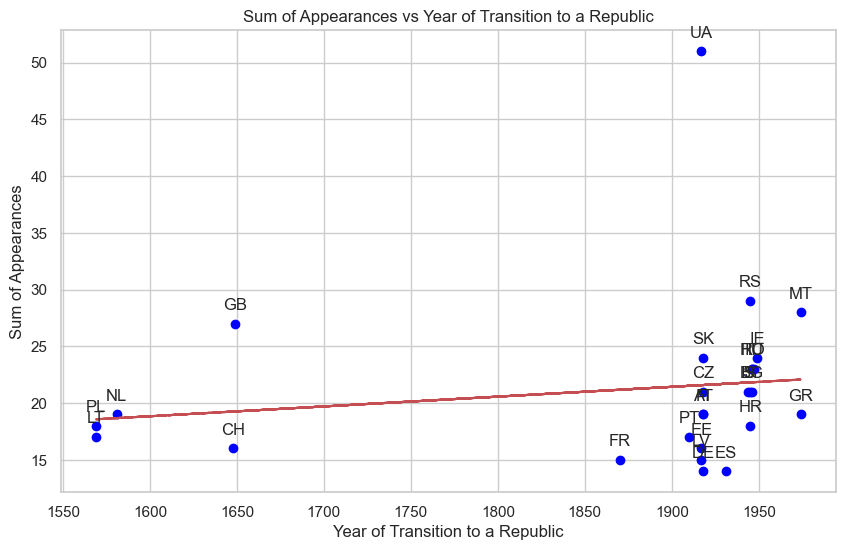

Intercept: 5.0093171689869
Slope: 0.008643520284140865
R-squared: 0.025180031993648044


In [47]:
# Remove rows with NaN or infinite values in 'transition to a republic' or 'sum_appearances'
Europe = Europe[np.isfinite(Europe['transition to a republic']) & np.isfinite(Europe['sum_appearances'])]

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(Europe['transition to a republic'], Europe['sum_appearances'], color='blue')

# Annotate each point with the country_iso2
for i, txt in enumerate(Europe['country_iso2']):
    plt.annotate(txt, (Europe['transition to a republic'].iat[i], Europe['sum_appearances'].iat[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add a trend line
z = np.polyfit(Europe['transition to a republic'], Europe['sum_appearances'], 1)
p = np.poly1d(z)
plt.plot(Europe['transition to a republic'], p(Europe['transition to a republic']), "r--")

# Add labels and title
plt.xlabel('Year of Transition to a Republic')
plt.ylabel('Sum of Appearances')
plt.title('Sum of Appearances vs Year of Transition to a Republic')

# Show the plot
plt.show()


# Remove rows with NaN or infinite values in 'transition to a republic' or 'sum_appearances'
Europe = Europe[np.isfinite(Europe['transition to a republic']) & np.isfinite(Europe['sum_appearances'])]

# Prepare the data for linear regression
X = Europe['transition to a republic'].values.reshape(-1, 1)
y = Europe['sum_appearances'].values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Extract the parameters
intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, y)

# Display the results
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"R-squared: {r_squared}")

<html>
<h2>British colonialism vs. Series Popularity</h2>
<p>In this section of my analysis, I aimed to explore how the historical context of British colonialism and the transition of countries to independence might influence the popularity of "The Crown." This required an intricate setup and execution of data manipulation and visualization processes. Here’s a detailed breakdown:</p>

<h3>Data Preparation</h3>
<ul>
    <li><strong>Independence Years Dictionary:</strong> I created a dictionary mapping country ISO codes to their respective years of independence. This is crucial for examining the influence of historical independence on current viewership trends.</li>
    <li><strong>Country Name Mapping:</strong> To make the analysis more interpretable, I mapped ISO country codes to their full names using a second dictionary.</li>
</ul>

<h3>Data Integration</h3>
<p>I merged the independence year data with the <code>rank_stats_df</code> DataFrame based on country ISO codes. This allowed me to directly relate each country’s viewership data to its year of independence.</p>

<h3>Data Cleaning</h3>
<p>I cleaned the data by dropping rows where the independence year was missing to ensure the robustness of the subsequent analysis. I also converted the 'sum_appearances' and 'independence_year' columns to integers for accurate numerical analysis.</p>

<h3>Data Sorting and Mapping</h3>
<p>The DataFrame was sorted based on the independence year to prepare for visualization. I mapped the ISO country codes to full country names to enhance the readability of the visualizations.</p>

<h3>Visualization</h3>
<p>Using matplotlib, I created a bar chart that visually represents the sum of appearances of "The Crown" by the year each country gained independence. This helps visually assess any trends or patterns. I added annotations on each bar to display the country names, making the chart informative at a glance.</p>
</html>


Coefficient: -0.06998057127148583
Intercept: 147.72552741753933
R-squared: 0.08614048625276027


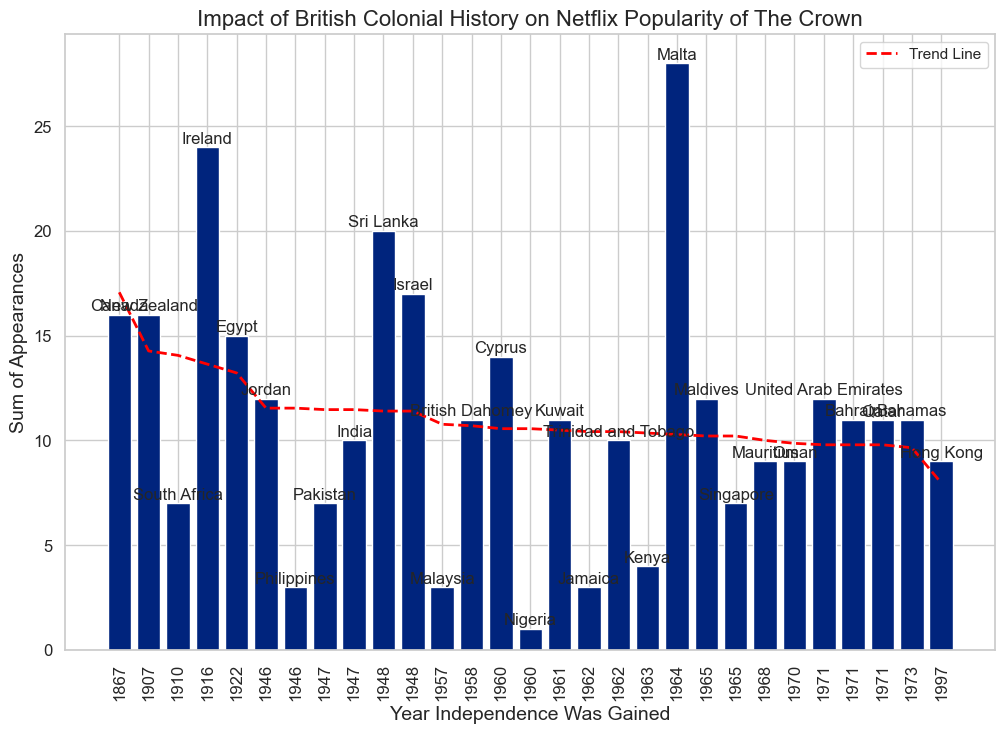

In [48]:
# Independence years dictionary
independence_years = {
    'MT': 1964, 'LK': 1948, 'IL': 1948, 'EG': 1922, 'CY': 1960,
    'MV': 1965, 'AE': 1971, 'JO': 1946, 'BS': 1973, 'QA': 1971,
    'BH': 1971, 'KW': 1961, 'IN': 1947, 'TT': 1962, 'OM': 1970,
    'MU': 1968, 'PK': 1947, 'KE': 1963, 'JM': 1962, 'MY': 1957, 'NG': 1960,
    'AD': 1967, 'SD': 1956, 'AQ': 1931, 'BB': 1966, 'BD': 1958, 'BI': 1947,
    'BN': 1984, 'BW': 1965, 'BZ': 1981, 'CA': 1867, 'CM': 1960, 'DM': 1978,
    'FJ': 1970, 'GD': 1974, 'GH': 1957, 'GI': 1713, 'GM': 1965, 'GY': 1966,
    'HK': 1997, 'IE': 1916, 'KE': 1963, 'KI': 1979, 'KN': 1983, 'KY': 1962,
    'LC': 1979, 'LS': 1966, 'MW': 1964, 'NA': 1990, 'NF': 1914, 'NR': 1968,
    'NZ': 1907, 'PG': 1975, 'PH': 1946, 'PW': 1994, 'SB': 1978, 'SC': 1976,
    'SG': 1965, 'SL': 1961, 'SZ': 1968, 'TO': 1970, 'TV': 1978, 'TZ': 1961,
    'UG': 1962, 'VU': 1980, 'WS': 1962, 'ZA': 1910, 'ZW': 1980
}

# Country name map
country_name_map = {
    
    'MT': 'Malta', 'LK': 'Sri Lanka', 'IL': 'Israel', 'EG': 'Egypt',
    'CY': 'Cyprus', 'MV': 'Maldives', 'AE': 'United Arab Emirates', 'JO': 'Jordan',
    'BS': 'Bahamas', 'QA': 'Qatar', 'BH': 'Bahrain', 'KW': 'Kuwait', 'IN': 'India',
    'TT': 'Trinidad and Tobago', 'OM': 'Oman', 'MU': 'Mauritius', 'PK': 'Pakistan',
    'KE': 'Kenya', 'JM': 'Jamaica', 'MY': 'Malaysia', 'NG': 'Nigeria',
    'AD': 'Aden Protectorate', 'SD': 'Anglo-Egyptian Sudan', 'AQ': 'Auckland Islands',
    'BB': 'Barbados', 'BD': 'British Dahomey', 'BI': 'British India', 'BN': 'Brunei',
    'BW': 'British Western Pacific Territories', 'BZ': 'Belize', 'CA': 'Canada',
    'CM': 'Cameroons', 'DM': 'Dominica', 'FJ': 'Fiji', 'GD': 'Grenada',
    'GH': 'Ghana', 'GI': 'Gibraltar', 'GM': 'Gambia', 'GY': 'Guyana',
    'HK': 'Hong Kong', 'IE': 'Ireland', 'JM': 'Jamaica', 'KE': 'Kenya',
    'KI': 'Kiribati', 'KN': 'Saint Kitts and Nevis', 'KY': 'Cayman Islands',
    'LC': 'Saint Lucia', 'LS': 'Lesotho', 'MW': 'Malawi', 'MY': 'Malaysia',
    'NA': 'Namibia', 'NF': 'Norfolk Island', 'NR': 'Nauru', 'NZ': 'New Zealand',
    'PG': 'Papua New Guinea', 'PH': 'Philippines', 'PK': 'Pakistan', 'PW': 'Palau',
    'SB': 'Solomon Islands', 'SC': 'Seychelles', 'SG': 'Singapore', 'SL': 'Sierra Leone',
    'SZ': 'Swaziland', 'TO': 'Tonga', 'TT': 'Trinidad and Tobago', 'TV': 'Tuvalu',
    'TZ': 'Tanzania', 'UG': 'Uganda', 'VU': 'Vanuatu', 'WS': 'Western Samoa',
    'ZA': 'South Africa', 'ZW': 'Zimbabwe'
}


# Merge independence years with rank_stats_df
rank_stats_df['independence_year'] = rank_stats_df['country_iso2'].map(independence_years)

# Drop rows with missing independence years
rank_stats_df = rank_stats_df.dropna(subset=['independence_year'])

# Convert columns to appropriate types
rank_stats_df['sum_appearances'] = rank_stats_df['sum_appearances'].astype(int)
rank_stats_df['independence_year'] = rank_stats_df['independence_year'].astype(int)

# Sort the DataFrame by independence year
rank_stats_df = rank_stats_df.sort_values(by='independence_year')

# Map ISO2 codes to full country names
rank_stats_df['country_name'] = rank_stats_df['country_iso2'].map(country_name_map)

# Create a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(rank_stats_df)), rank_stats_df['sum_appearances'], color='#00247D')
plt.xlabel('Year Independence Was Gained', fontsize=14)
plt.ylabel('Sum of Appearances', fontsize=14)
plt.title('Impact of British Colonial History on Netflix Popularity of The Crown', fontsize=16)
plt.xticks(range(len(rank_stats_df)), rank_stats_df['independence_year'], rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Add the country names on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, rank_stats_df.iloc[i]['country_name'], ha='center', va='bottom', fontsize=12)

# Add a trend line
X = rank_stats_df['independence_year'].values.reshape(-1, 1)
y = rank_stats_df['sum_appearances'].values
model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(X)

# Plot the trend line
plt.plot(range(len(rank_stats_df)), trend_line, color='red', linestyle='--', linewidth=2, label='Trend Line')
plt.legend()

# Print model coefficients and R-squared value
print(f'Coefficient: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')


plt.show()

<html>
<h3>Trend Analysis</h3>
<p>I performed a linear regression analysis to quantify and visualize any potential trends between the independence year and the show's appearances. The trend line was plotted to provide a clear visual indicator of the relationship’s direction. I reported the linear regression model's coefficient, intercept, and R-squared value to quantify the relationship’s strength and direction.</p>

<h2>Key Results</h2>
<ul>
    <li><strong>Coefficient:</strong> -0.06998057127148583 suggests a slight decrease in appearances for each year closer to the present since gaining independence.</li>
    <li><strong>Intercept:</strong> 147.72552741753933 indicates the baseline popularity score for the earliest year of independence within the dataset.</li>
    <li><strong>R-squared:</strong> 0.08614048625276027 reveals that only about 8.6% of the variance in the sum of appearances is explained by the year of independence, suggesting that other factors are more influential in determining the show’s popularity.</li>
</ul>
</html>


 👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑 👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑 👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑 👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑 👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑 👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     👑     